# Análise dos dados (Consumidores)

Neste documento será apresentado a análise dos dados de diferentes consumidores do site [consumidor.gov.br](https://consumidor.gov.br).

Grupo:

- Carlos Augusto dos Santos Neto;
- Felipe Menino Carlos;
- Maurício Yassunaga;
- Weslei Luiz de Paula Pinto.

É importante lembrar que, a análise feita aqui é apenas exploratório, ou seja, apenas para entender melhor os dados e suas relações, não há ainda definições concretas. 

#### Separação do documento

Este documento é dividido em duas partes, na primeira, apresento um escopo básico de análise, utilizando os dados de 2019, e então no segundo escopo, busco respostas para uma questão que me surgiu enquanto analisava os dados do primeiro escopo. Para o segundo caso, utilizei os dados do primeiro semestre de 2017.


In [13]:
import pandas as pd

%matplotlib inline

## Carregando os dados

Nesta etapa os dados são carregados e seus cabeçalhos são editados.

In [122]:
colunas = ['regiao', 'uf', 'cidade', 'sexo', 'faixa_etaria', 'data_finalizacao',
       'tempo_resposta', 'nome_fantasia', 'segmento_de_mercado', 'area',
       'assunto', 'grupo_problema', 'problema', 'como_contratou',
       'procurou_empresa', 'respondida', 'situacao', 'avaliacao_reclamacao',
       'nota_do_consumidor', 'total']

In [123]:
df = pd.read_csv("dados/consumidores/9_1_2019.csv", sep=";", encoding="latin-1")
df.columns = colunas

## Verificando estrutura geral dos dados

Para verificar quais atributos estão presentes nos dados, olhemos o head

In [3]:
df.head()

regiao  uf           cidade sexo        faixa_etaria data_finalizacao  \
0     SE  RJ         Papucaia    F  entre 61 a 70 anos       30/01/2019   
1     SE  RJ           Japeri    M  entre 31 a 40 anos       28/01/2019   
2     SE  SP        São Paulo    M  entre 31 a 40 anos       31/01/2019   
3     SE  SP  Pindamonhangaba    M  entre 51 a 60 anos       26/01/2019   
4     SE  SP        São Paulo    F  entre 21 a 30 anos       24/01/2019   

   tempo_resposta     nome_fantasia  \
0             3.0        Banco Pan    
1             0.0  Serasa Experian    
2             2.0           Samsung   
3             1.0               NET   
4             0.0  Serasa Experian    

                                 segmento_de_mercado  \
0    Bancos, Financeiras e Administradoras de Cartão   
1        Bancos de Dados e Cadastros de Consumidores   
2  Fabricantes - Eletroeletrônicos,  Produtos de ...   
3  Operadoras de Telecomunicações (Telefonia, Int...   
4        Bancos de Dados e Cadastros de Consumidores   

                                  area  \
0                 Serviços Financeiros   
1                 Serviços Financeiros   
2  Produtos de Telefonia e Informática   
3                     Telecomunicações   
4                 Serviços Financeiros   

                                             assunto          grupo_problema  \
0  Crédito Consignado (Empréstimo descontado em f...  Cobrança / Contestação   
1  Banco de Dados e Cadastros de Consumidores (SP...              Informação   
2                                             Tablet       Saúde e Segurança   
3                       Pacote de Serviços ( Combo )  Cobrança / Contestação   
4  Banco de Dados e Cadastros de Consumidores (SP...              Informação   

                                            problema como_contratou  \
0  Dificuldade para obter boleto de quitação ou i...       Telefone   
1  Dados pessoais ou financeiros consultados, col...       Telefone   
2  Risco, dano físico ou mal estar decorrente da ...       Internet   
3              Cobrança após cancelamento do serviço       Internet   
4  Dados pessoais ou financeiros consultados, col...       Internet   

  procurou_empresa respondida             situacao avaliacao_reclamacao  \
0                S          S  Finalizada avaliada        Não Resolvida   
1                S          S  Finalizada avaliada        Não Resolvida   
2                N          S  Finalizada avaliada        Não Resolvida   
3                S          S  Finalizada avaliada            Resolvida   
4                N          S  Finalizada avaliada        Não Resolvida   

   nota_do_consumidor  total  
0                 1.0      1  
1                 1.0      1  
2                 1.0      1  
3                 5.0      1  
4                 1.0      1

## Delimitando um escopo

Para ficar mais simples analisar os dados, vamos definir um pequeno escopo. Para este caso, defini todas as farmácias de SP.

In [34]:
farmacias = df[df["segmento_de_mercado"] == "Farmácias"]

## Segmentando os dados (1° momento)

Para facilitar o entendimento dos dados, vejamos eles divididos em difentes partes. 

### Sexo e Idade ($\overline{M}$)

In [35]:
segmentos_por_idade = farmacias.groupby(["sexo", "faixa_etaria"]).mean(); segmentos_por_idade

tempo_resposta  nota_do_consumidor  total
sexo faixa_etaria                                                 
F    entre 21 a 30 anos       12.000000            1.000000      1
     entre 31 a 40 anos        6.583333            2.250000      1
     entre 51 a 60 anos        8.666667            4.000000      1
     mais de 70 anos           7.000000            1.000000      1
M    entre 21 a 30 anos        2.000000            2.333333      1
     entre 31 a 40 anos        6.750000            1.000000      1
     entre 41 a 50 anos        8.000000            1.000000      1
     entre 51 a 60 anos        2.000000            3.000000      1
     entre 61 a 70 anos       10.000000            1.000000      1
     mais de 70 anos           3.000000            1.000000      1

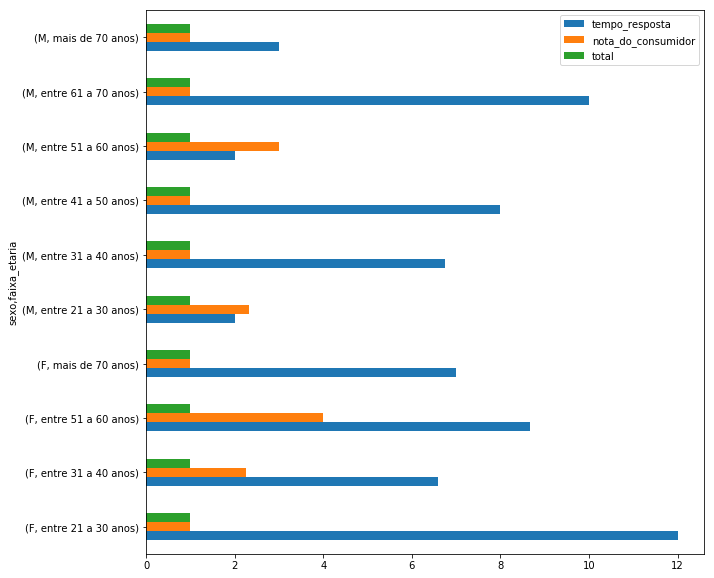

In [36]:
segmentos_por_idade.plot.barh(figsize=(10, 10))

### Formas de contratação ($\overline{M}$)

In [37]:
segmentos_por_forma_de_compra = farmacias.groupby("como_contratou").mean(); segmentos_por_forma_de_compra

tempo_resposta  nota_do_consumidor  total
como_contratou                                           
Domicílio            13.000000                 1.0      1
Internet              6.791667                 2.0      1
Loja física           3.800000                 2.0      1

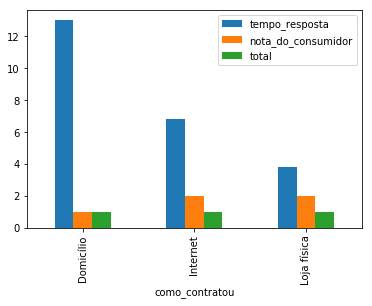

In [38]:
segmentos_por_forma_de_compra.plot.bar()

### Formas de contratação ($\sum$)

In [39]:
segmentos_por_forma_de_compra_sum = farmacias.groupby("como_contratou").sum(); segmentos_por_forma_de_compra_sum

tempo_resposta  nota_do_consumidor  total
como_contratou                                           
Domicílio                 13.0                 1.0      1
Internet                 163.0                28.0     25
Loja física               19.0                10.0      6

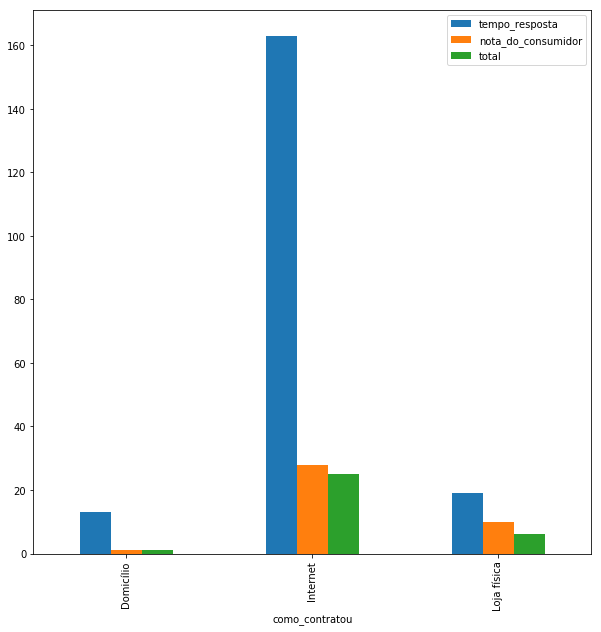

In [40]:
segmentos_por_forma_de_compra_sum.plot.bar(figsize=(10, 10))

### Faixa etária e avaliação ($\sum$)

In [41]:
segmentos_por_situacao = farmacias.groupby(["avaliacao_reclamacao", "faixa_etaria"]).sum(); segmentos_por_situacao

tempo_resposta  nota_do_consumidor  \
avaliacao_reclamacao faixa_etaria                                             
Não Avaliada         entre 21 a 30 anos             9.0                 0.0   
                     entre 31 a 40 anos            48.0                 0.0   
                     entre 51 a 60 anos            18.0                 0.0   
Não Resolvida        entre 21 a 30 anos            16.0                 3.0   
                     entre 31 a 40 anos            34.0                 7.0   
                     entre 61 a 70 anos            10.0                 1.0   
                     mais de 70 anos               13.0                 3.0   
Resolvida            entre 21 a 30 anos             5.0                 5.0   
                     entre 31 a 40 anos            24.0                12.0   
                     entre 41 a 50 anos             8.0                 1.0   
                     entre 51 a 60 anos            10.0                 7.0   

                                         total  
avaliacao_reclamacao faixa_etaria               
Não Avaliada         entre 21 a 30 anos      2  
                     entre 31 a 40 anos      8  
                     entre 51 a 60 anos      2  
Não Resolvida        entre 21 a 30 anos      3  
                     entre 31 a 40 anos      4  
                     entre 61 a 70 anos      1  
                     mais de 70 anos         3  
Resolvida            entre 21 a 30 anos      1  
                     entre 31 a 40 anos      5  
                     entre 41 a 50 anos      1  
                     entre 51 a 60 anos      2

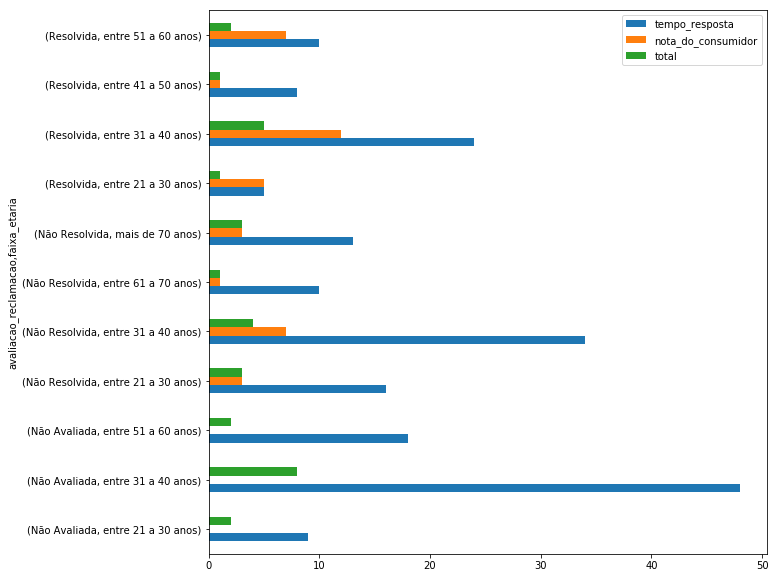

In [48]:
segmentos_por_situacao.plot.barh(figsize=(10, 10))

### Estados ($\sum$)

In [50]:
segmentos_por_estado = farmacias.groupby("uf").sum(); segmentos_por_estado

tempo_resposta  nota_do_consumidor  total
uf                                           
ES             0.0                 1.0      1
GO             1.0                 1.0      1
MG            11.0                 5.0      2
PR            45.0                 9.0      5
RJ            27.0                10.0      5
RS            12.0                 5.0      3
SC             2.0                 1.0      2
SP            97.0                 7.0     13

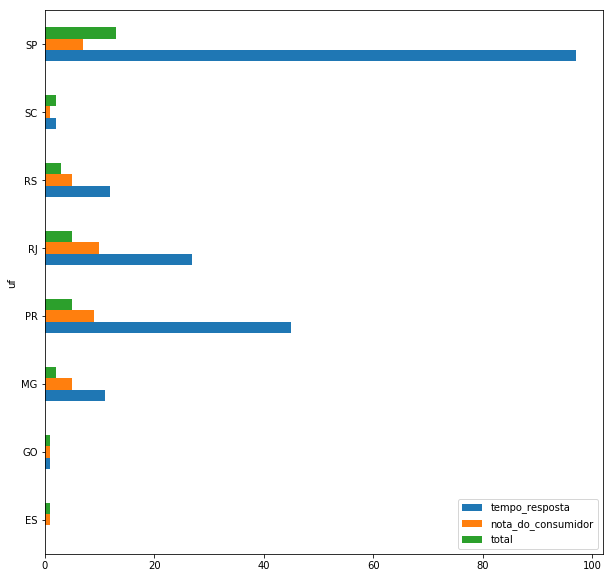

In [54]:
segmentos_por_estado.plot.barh(figsize=(10, 10))

## Definição de escopo (2° momento)

Após já conhecer características gerais dos dados, comecei a pensar em qual qual empresa é boa por estado, porém, isto acabou sendo muito genérico, mudei então para as cidades, especificamente São José dos Campos, e neste ponto fiz questionamento, qual empresa de telecomunicação atende melhor seus clientes ? Então esta parte busca responder esta questão e possívelmente nos ajuda a definir o tema do projeto.

`OBS`: Os dados utilizados são do primeiro semestre de 2017

In [124]:
df = pd.read_csv("dados/consumidores/5_1_2017.csv", sep=";", encoding="latin-1")

df.columns = colunas

## Separando a cidade de São José dos Campos (Telecomunicações)

In [91]:
sjc_tel = df[
    (df["cidade"] == "São José dos Campos") & (df["area"] == "Telecomunicações")
]

Abaixo realizo apenas uma agregação por idade, apenas para verificar se com a faixa etária, varia-se muito o tempo de resposta, e na verdade, percebi que, `varia bastante`.

In [97]:
sjc_tel.groupby("faixa_etaria").sum()

tempo_resposta  nota_do_consumidor  total
faixa_etaria                                                 
até 20 anos                  132.0                53.0     20
entre 21 a 30 anos          1457.0               549.0    202
entre 31 a 40 anos          1897.0               619.0    249
entre 41 a 50 anos           741.0               259.0     96
entre 51 a 60 anos           483.0               151.0     63
entre 61 a 70 anos           139.0                35.0     18
mais de 70 anos              102.0                16.0     12

Ao ver a tabela acima, fiquei curioso para entender qual empresa melhor atende levando em consideração a idade, e também a opção de compra.

Você verá que eu fiz o filtro primeiro pelo tipo de compra, isto porque queria saber apenas de quem comprou, e não de quem ganhou de presente. Há também a escolha de três empresas, isto foi apenas para ilustrar a situação, evitando crescimento de regras para o entendimento.

In [125]:
sjc_tel = sjc_tel[(sjc_tel["como_contratou"] != "Não comprei / contratei") & \
                 (sjc_tel["como_contratou"] != "Stand, feiras e eventos") & \
                 (sjc_tel["como_contratou"] != "Ganhei de presente")]

In [126]:
sjc_tel = sjc_tel[(sjc_tel["nome_fantasia"] == "Oi Celular") | \
                  (sjc_tel["nome_fantasia"] == "Tim") | \
                  (sjc_tel["nome_fantasia"] == "Claro Celular")]

In [128]:
sjc_tel.groupby(["faixa_etaria", "nome_fantasia", "como_contratou"]).sum()

tempo_resposta  \
faixa_etaria       nome_fantasia como_contratou                            
até 20 anos        Claro Celular Loja física                         9.0   
                   Oi Celular    Loja física                         9.0   
                   Tim           Loja física                        34.0   
                                 SMS / Mensagem de texto             3.0   
entre 21 a 30 anos Claro Celular Internet                           13.0   
                                 Loja física                        20.0   
                                 Telefone                           10.0   
                   Oi Celular    Internet                           10.0   
                                 Loja física                        56.0   
                                 Telefone                           33.0   
                   Tim           Domicílio                          12.0   
                                 Internet                           40.0   
                                 Loja física                        47.0   
                                 Telefone                           84.0   
entre 31 a 40 anos Claro Celular Loja física                        20.0   
                                 Telefone                           16.0   
                   Oi Celular    Loja física                       104.0   
                                 Telefone                           29.0   
                   Tim           Internet                           31.0   
                                 Loja física                       132.0   
                                 SMS / Mensagem de texto             2.0   
                                 Telefone                          116.0   
entre 41 a 50 anos Claro Celular Internet                            8.0   
                                 Loja física                         9.0   
                   Oi Celular    Loja física                        19.0   
                                 Telefone                           23.0   
                   Tim           Internet                           25.0   
                                 Loja física                        36.0   
                                 SMS / Mensagem de texto             9.0   
                                 Telefone                           39.0   
entre 51 a 60 anos Oi Celular    Loja física                        13.0   
                   Tim           Telefone                           10.0   
entre 61 a 70 anos Claro Celular Telefone                            9.0   
                   Tim           Internet                            1.0   
                                 Telefone                            2.0   
mais de 70 anos    Oi Celular    Loja física                         9.0   

                                                          nota_do_consumidor  \
faixa_etaria       nome_fantasia como_contratou                                
até 20 anos        Claro Celular Loja física                             5.0   
                   Oi Celular    Loja física                             5.0   
                   Tim           Loja física                            13.0   
                                 SMS / Mensagem de texto                 0.0   
entre 21 a 30 anos Claro Celular Internet                                3.0   
                                 Loja física                             5.0   
                                 Telefone                                5.0   
                   Oi Celular    Internet                                4.0   
                                 Loja física                            22.0   
                                 Telefone                               19.0   
                   Tim           Domicílio                               8.0   
                                 Internet                               13.0   
                                 Loja física     

Veja que bacana! Geramos regras que poderemos utilizar no trabalho de I.A! Aqui há muitas regras, o suficiente para todos treinar e ao mesmo tempo, tem-se a possibilidade de criar regras encadeadas, pensei nas sequintes questões para o sistema especialista.

- Qual a empresa que melhor me atende, levando em consideração a idade, onde vou comprar e minha tolerância a demoras;
- Qual empresa você não me recomenda (Básicamente o oposto do feito acima).